## ***Libraries***

In [ ]:
#Import useful libraries--------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas as pd
  '''minutes=[]
  hours=[]
  for i in ast:
    i=int(i)
    i=str(i)
    if len(i)==3:
      m=i[:-2]
      h=i[-1:]
      minutes.append(m)
      hours.append(h)

    elif len(i)==4:
      m=i[:-2]
      h=i[-2:] 
      minutes.append(m)
      hours.append(h)  '''

## ***Data Extraction***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


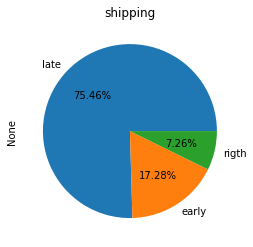

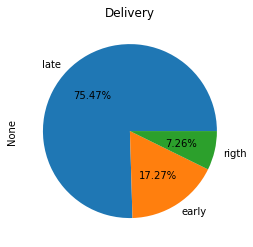

In [68]:
#Data extraction----------------------------------------------------------------


from google.colab import drive
drive.mount('/content/drive')

deliv=pd.read_csv('/content/drive/MyDrive/delivery_dataset.csv',sep=';')

data=pd.DataFrame(deliv)
data=data.dropna()
A_Stime=data["Actual_Shipment_Time"]
P_Stime=data["Planned_Shipment_Time"]
P_Dtime=data["Planned_Delivery_Time"]
S_Dtime=data["Shipment_Delay"]
P_Ttravel=data["Planned_TimeofTravel"]

def Shipping_expectation(ast,pst):
  time_sh={"S":[]}
  for x,y in zip(ast,pst): 
    if x==y:
      time_sh["S"].append("rigth")
    elif x<y:
      time_sh["S"].append("early")
    elif x>y:
      time_sh["S"].append("late")
  return time_sh
  
def Delivery_expectation(sdt):
  time_del={"D":[]}
  for x in sdt: 
    if x==0:
      time_del["D"].append("rigth")
    elif x<0:
      time_del["D"].append("early")
    elif x>0:
      time_del["D"].append("late")
  return time_del 



  pass

#data["Year"][3]
A_Stime=data["Actual_Shipment_Time"]
P_Stime=data["Planned_Shipment_Time"]
P_Dtime=data["Planned_Delivery_Time"]
S_Dtime=data["Shipment_Delay"]
P_Ttravel=data["Planned_TimeofTravel"]


#data.info()
#S_Dtime#
shipping_expec=Shipping_expectation(A_Stime,P_Stime)
shipping_expec=pd.DataFrame(shipping_expec)
shipping_expec.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="shipping",autopct='%1.2f%%')
plt.show()

Delivery_expec=Delivery_expectation(S_Dtime)
Delivery_expec=pd.DataFrame(Delivery_expec)
Delivery_expec.value_counts().plot(kind="pie",labels=["late","early","rigth"],title="Delivery",autopct='%1.2f%%')
plt.show()
